In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from util import get_stock, bin_data, split_data

In [9]:
# Define parameters
stock, restrict, bin_size = ['^GSPC', '1980-01-01', '2024-10-01'], 100, 365

# Get the stock data, makes bins, and split the data
df, restricted_df, index = get_stock(stock[1], stock[2], stock[0], restrict)
bins = bin_data(df, bin_size)
X_train, y_train, X_test, y_test, train_index, test_index, train_size, test_size = split_data(bins, df, index, bin_size)

[*********************100%***********************]  1 of 1 completed


# Train The Linear Model

### Specifics:
Consider the time series data input as a vector $x = \begin{bmatrix} p_{t - k} \\  dots \\ p_{t-1} \end{bmatrix}$

let $x^* = \begin{bmatrix} 1 \\ x \end{bmatrix}$
and $w = \begin{bmatrix} b \\  arphi_{t - k} \\  dots \\  arphi_{t - 1} \end{bmatrix}$

We make $x_0 = 1$ and $w_0 = b$ the bias term

We minimize the Mean Squared Error:
$MSE = \frac{1}{n} \sum_{i = 1}^{n} (w^T x_i - y_i)^2$ and find the optimal weights by taking the derivative and solving for $w$

$$\min_{w \in R^{k + 1}} \enspace MSE = \min_{ w \in R^{k + 1}} \enspace \frac{1}{n} \sum_{i = 1}^{n} ( w^T  x_i - y_i)^2 
$$
    $$\implies \frac{\partial}{\partial  w} \left [ \frac{1}{n} \sum_{i = 1}^{n} \left [ ( w^T  x_i)^2 - 2 y_i  w^T  x_i + y_i^2 \right ] \right ] = 0 \\
    \sum_{i = 1}^{n} \left [ \left ( 2  w^T  x_i \right )  x_i - 2 y_i  x_i \right ] = 0$$

let $X = bins$

$$2  X ( X  w^T)^T - 2  X  y = 0$$
$$ X  X^T  w =  X  y $$
$$w = \left (  X  X^T \right )^{-1}  X  y$$

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_) # weights, size is bin size
print(model.intercept_) # bias

[ 1.07291997e-02 -1.01158440e-03  2.32132316e-02 -3.55071723e-02
  1.10556267e-02 -1.00953372e-02  2.92347293e-03 -4.77019345e-03
  8.23115324e-03 -7.98818955e-03 -1.35311606e-02  2.56404146e-02
  5.24680125e-03 -8.48901105e-03 -9.66405169e-04 -9.71230178e-03
  1.14244970e-02 -9.00924701e-03  1.33942966e-02 -2.22112177e-02
  2.21361107e-02 -3.04837705e-03  1.18936653e-03  1.38965473e-02
 -5.95970763e-02  1.46626548e-02  1.18033356e-02 -6.39515229e-04
 -1.70493601e-02  2.97801974e-02 -1.15858056e-02 -6.62268010e-04
 -7.29140000e-03  2.13972411e-02  1.43372256e-02 -3.06623770e-03
 -1.88824552e-02 -1.18948764e-02 -5.20298601e-03  2.92396362e-02
  3.00500071e-03 -6.11337679e-03 -5.84271185e-03 -1.15238712e-02
  3.52941014e-02 -2.36992092e-02  1.06612236e-02 -2.75269419e-02
 -2.19962583e-03  2.82282329e-02 -1.77998125e-02  2.41321375e-02
 -1.27229810e-02 -2.09505360e-02  3.42817359e-02  1.60870681e-04
 -2.30829924e-02  2.85374414e-02 -7.77260395e-03 -2.70875759e-02
  1.47225673e-02 -2.39023

In [6]:
# now we make some predictions
y_pred = np.floor(model.predict(X_test))
y_test = np.floor(y_test)
print(y_pred.shape, y_test.shape)

for i in range(math.floor(len(y_pred) * 0.01)):
    print("prediction:", y_pred[i], "| actual:", y_test[i], "| difference:", abs(y_pred[i] - y_test[i]))
# print(y_pred)
print(X_test.shape)


(2163,) (2163,)
prediction: 1925.0 | actual: 1923.0 | difference: 2.0
prediction: 1919.0 | actual: 1951.0 | difference: 32.0
prediction: 1943.0 | actual: 1987.0 | difference: 44.0
prediction: 1984.0 | actual: 1979.0 | difference: 5.0
prediction: 1976.0 | actual: 1995.0 | difference: 19.0
prediction: 1995.0 | actual: 2013.0 | difference: 18.0
prediction: 2015.0 | actual: 2014.0 | difference: 1.0
prediction: 2021.0 | actual: 2017.0 | difference: 4.0
prediction: 2020.0 | actual: 2003.0 | difference: 17.0
prediction: 1992.0 | actual: 1994.0 | difference: 2.0
prediction: 1990.0 | actual: 2023.0 | difference: 33.0
prediction: 2018.0 | actual: 2033.0 | difference: 15.0
prediction: 2038.0 | actual: 2033.0 | difference: 5.0
prediction: 2030.0 | actual: 2030.0 | difference: 0.0
prediction: 2029.0 | actual: 2018.0 | difference: 11.0
prediction: 2025.0 | actual: 2052.0 | difference: 27.0
prediction: 2052.0 | actual: 2075.0 | difference: 23.0
prediction: 2076.0 | actual: 2071.0 | difference: 5.0
pr

# Results
As can be seen, the results are relatively close to the actual values if we adjust for a small margin of error.

(8652,) (2163,)


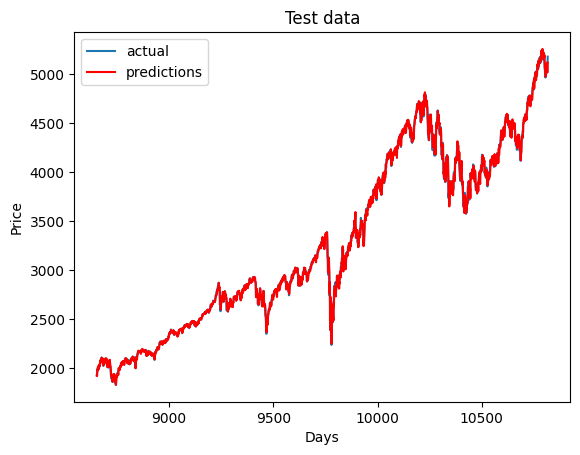

Correctly Classified: 1842/2163
Accuracy: 85.15950069348128%, error_margin of $50
Correctly Classified: 2105/2163
Accuracy: 97.31853906611188%, error_margin of $100


In [7]:
print(train_index.shape, test_index.shape)
plt.plot(test_index, y_test, label="actual")
plt.plot(test_index, y_pred, color="red", label="predictions")
plt.title("Test data")
plt.ylabel("Price")
plt.xlabel("Days")
plt.legend()
plt.show()

error_margin = 50
results = abs(y_pred - y_test) <= error_margin
print(f"Correctly Classified: {np.sum(results)}/{len(results)}")
print(f"Accuracy: {100 * np.sum(results) / len(results)}%, error_margin of ${error_margin}")

error_margin = 100
results = abs(y_pred - y_test) <= error_margin
print(f"Correctly Classified: {np.sum(results)}/{len(results)}")
print(f"Accuracy: {100 * np.sum(results) / len(results)}%, error_margin of ${error_margin}")

In [10]:
print(f"Tomorrows Price: {y_pred[-1]}")
print(y_pred[-15:])
print(y_test[-15:])

Tomorrows Price: 5120.0
[5079. 5058. 5028. 5020. 4976. 5003. 5042. 5079. 5030. 5101. 5112. 5049.
 5018. 5070. 5120.]
[5051.41015625 5022.20996094 5011.12011719 4967.22998047 5010.60009766
 5070.54980469 5071.62988281 5048.41992188 5099.95996094 5116.16992188
 5035.68994141 5018.39013672 5064.20019531 5127.79003906 5180.74023438]


# Autoregressive

We previously restricted the last 100 days from our data and we use it to test our auto regressive model that feeds the prediction back into the data. 

In [ ]:
# take the last bin and perform a prediction
print(bins[-1][-15:], bins.shape)

running_bin = bins[-1].copy()

next_predictions = []
for i in range(restrict): # predict the next 100 days
    prediction = model.predict([running_bin])

    # feed the prediction back into the input
    running_bin[:-1] = running_bin[1:]
    running_bin[-1] = prediction[0]

    # store predictions
    next_predictions.append(prediction[0])

# print(next_predictions[-10:])
days = np.arange(1, len(next_predictions) + 1)


plt.figure()
plt.plot(days, next_predictions, label = "Auto-Regressive")
plt.plot(days, restricted_df, label = f"Actual")
plt.xlabel(f"Days")
plt.ylabel("Price")
plt.legend()
plt.show()

print("First few days")
# plot the predictions
plt.figure()
plt.plot(days[:7], next_predictions[:7], label = "Auto-Regressive")
plt.plot(days[:7], restricted_df[:7], label = f"Actual")
plt.xlabel(f"Days")
plt.ylabel("Price")
plt.legend()
plt.show()


In [ ]:
# This function does everything we just showed
stock_list = ["^GSPC", "^DJI", "VIIIX", "VOO", "IVV"] # list of index funds
temp_stock = ['^GSPC', '1980-01-01', '2024-10-01']

for i in stock_list:
    temp_stock[0] = i
    print(i)
    test_stock(temp_stock, restrict=100)

# Conclusion

The model picks up on the overall trend of the stock but does not accurately represent the upward and downward spikes.